# 🌳 Decision Tree Regressor — Complete Notes (Data Science)

---

## 1. What is a Decision Tree Regressor?

A Decision Tree Regressor is a **supervised machine learning algorithm** used to predict **continuous numerical values**.  
It works by recursively splitting the feature space and predicting the **mean of target values** in each leaf node.

A regression tree is made of:
- **Root Node** — contains all samples
- **Internal Nodes** — binary splits on features
- **Leaf Nodes** — store prediction = average of target values in that region


**It works by:**
- Splitting the dataset based on feature thresholds.
- Creating rectangular regions in feature space.
- Returning the mean value of samples in each leaf node.

**Real-life intuition:**

Think of estimating house price:

- If area < 1200 sqft → Price ≈ 20 lakh
- If area ≥ 1200 sqft and bedrooms ≤ 2 → Price ≈ 35 lakh
- If area ≥ 1200 sqft and bedrooms ≥ 3 → Price ≈ 50 lakh

> Each condition is a branch.<br>Each group is a leaf with average price.

### Another 🌳 Example

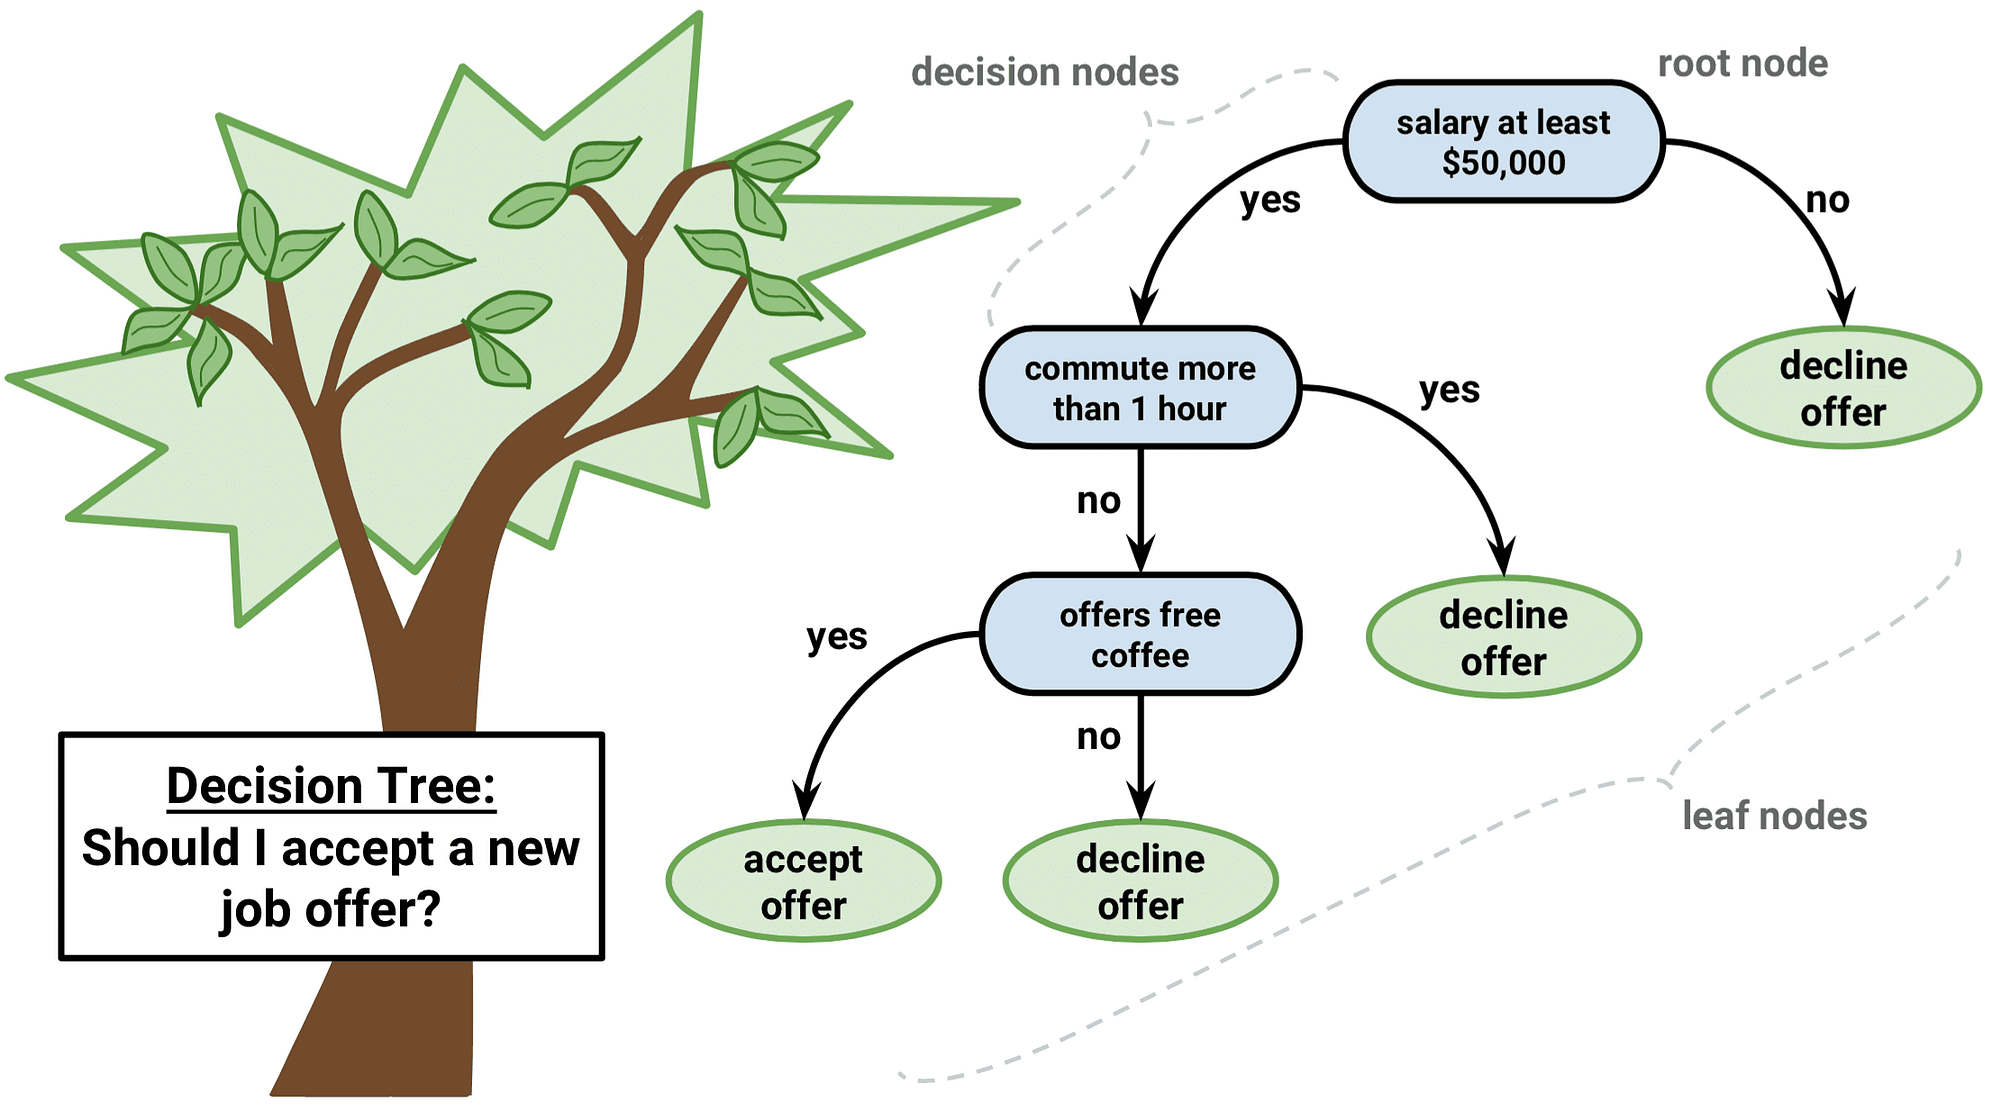

---


## 🔥 2. How CART builds a Regression Tree

Decision Tree in `sklearn` uses **CART** (Classification and Regression Trees).

Unlike classification trees (GINI or entropy), regression trees minimize **variance** / **squared error**.

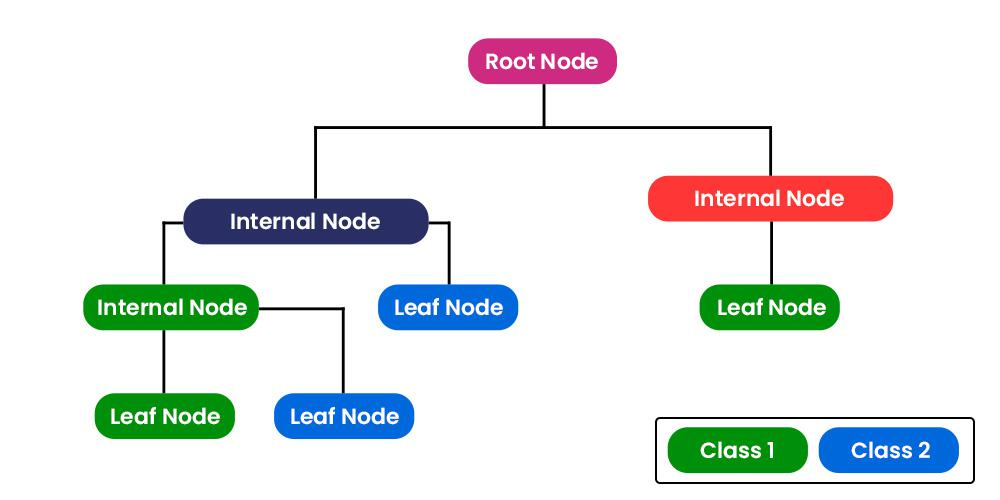

---

### 2.1 Objective

For regression, CART minimizes **Sum of Squared Errors (SSE)**.

Given a node with values $( y_1, y_2, ..., y_n )$:

Prediction at the node:
$$
\hat{y} = \frac{1}{n}\sum_{i=1}^{n}y_i
$$

Loss at node:
$$
SSE = \sum_{i=1}^{n}(y_i - \hat{y})^2
$$

---

### 2.2 Split Criterion

Split dataset into left and right nodes based on a threshold.

For a split:
$$
L_{split} = SSE_L + SSE_R
$$

We select:
$$
argmin_{feature,threshold} (SSE_L + SSE_R)
$$

---

### 2.3 How thresholds are chosen

For a continuous feature:
1. Sort values.
2. Try splits at **midpoints of unique adjacent values**.

Example:
Values: [10, 25, 40]
Thresholds:
- 17.5
- 32.5

CART does **not look at infinite values**.

---

## 3. Properties of Decision Tree Regression

### 3.1 Predictions are Piecewise Constant

A regression tree approximates a function as horizontal segments.
Every leaf has a constant predicted value.

---

### 3.2 No Need for Scaling
Decision trees don’t require:
- Standardization
- Min-max normalization

They split using threshold comparisons.

---

### 3.3 Handles Nonlinearity
Decision trees detect complex relations automatically.

---

## 4. Advantages

- Works with both numeric and categorical features
- No normalization needed
- Interpretable
- Can model nonlinear relationships
- Robust to outliers

---

## ❗ 5. Disadvantages

- **Very prone to overfitting**
- Sensitive to small data changes
- Hard to generalize smooth curves
- Greedy / local optimum approach

---

## 🪓 6. Hyperparameters (sklearn)

> Most important controls of complexity

| Parameter | Description | Effect |
|---|---|---|
| `max_depth` | Maximum depth of tree | Major anti-overfitting |
| `min_samples_split` | Minimum samples to split a node | Higher → simpler |
| `min_samples_leaf` | Minimum samples per leaf | Smooths predictions |
| `max_leaf_nodes` | Upper limit on # leaves | Restricts complexity |
| `criterion` | Loss metric | "squared_error", "friedman_mse", "poisson" |
| `ccp_alpha` | Cost-complexity pruning | Post-pruning |

---

### Suggested Defaults
- `max_depth = 4–8`
- `min_samples_leaf = 5–20`

---


## 7. 🌲 Code Example Basic Decision Tree Regressor

In [13]:
#creating synthetic dataset
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples = 500,
    n_features = 1,
    noise = 20,
    random_state = 42
)


In [14]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Building the tree

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(
    max_depth  = 4, # 🚀 max_depth prevents overfitting
    min_samples_leaf = 10 # 🚀 min_samples_leaf makes prediction smoother
)

dtr.fit(X_train, y_train)




DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)

## 8. **🛡️ Pre-Pruning: Controlling Tree Growth**

Unlike **Post-Pruning** (which cuts branches after growing), **Pre-Pruning** stops the tree from growing too wild while it is being built. It sets strict rules for the "construction" phase.

We used the following code example:

dtr \= DecisionTreeRegressor(  
 max\_depth \= 4,  
 min\_samples\_leaf \= 10  
)

### **1\. max\_depth (The Vertical Limit)**

**The "Hierarchy Limit"**

This parameter controls the maximum length of the path from the root to a leaf.

| Aspect | Explanation |
| --- | --- |
| **Concept** | "You can only ask a maximum of 4 questions in a row to reach a decision." |
| **Visual** 📏 | It limits how **tall** the tree can grow. |
| **Effect** 📉 | **Prevents Overfitting.** It stops the model from learning super specific, long, complex rules. *(Warning: If too low, the model becomes too simple/stupid).* |

### **2\. min\_samples\_leaf (The Smoothing Limit)**

**The "Minimum Crowd Size"**

This parameter guarantees that every leaf (final decision node) has a minimum number of samples.

| Aspect | Explanation |
| --- | --- |
| **Concept** | "You are not allowed to create a leaf node unless there are at least 10 data points in that group." |
| **Visual** 👥 | It forces the leaves to be **dense** rather than sparse/lonely. |
| **Effect** 🧹 | **Removes Noise & Smooths Predictions.** In Regression, the prediction is the *average* of the leaf. Averaging 10 numbers is much safer and more stable than relying on just 1 outlier. |

## **3\. ⚖️ The Combined Effect: A Conservative Tree**

By setting max\_depth=4 and min\_samples\_leaf=10, you create a **Conservative Tree**:

1. **Short:** It won't learn complex, deep interactions (max 4 splits).
2. **Broad:** It won't make decisions based on tiny, isolated clusters of data.

**Result:** You trade off some **variance** (it won't perfectly memorize training data) for better **bias** (it is more stable on new, unseen data).

In [16]:
# now checking the score

dtr.score(X_test, y_test)

0.9048084252608494

In [17]:
from sklearn.metrics import r2_score

print(f"R2 Score : {r2_score(y_test, dtr.predict(X_test))}")

R2 Score : 0.9048084252608494


## 9. 🎄 Tree Visualization :


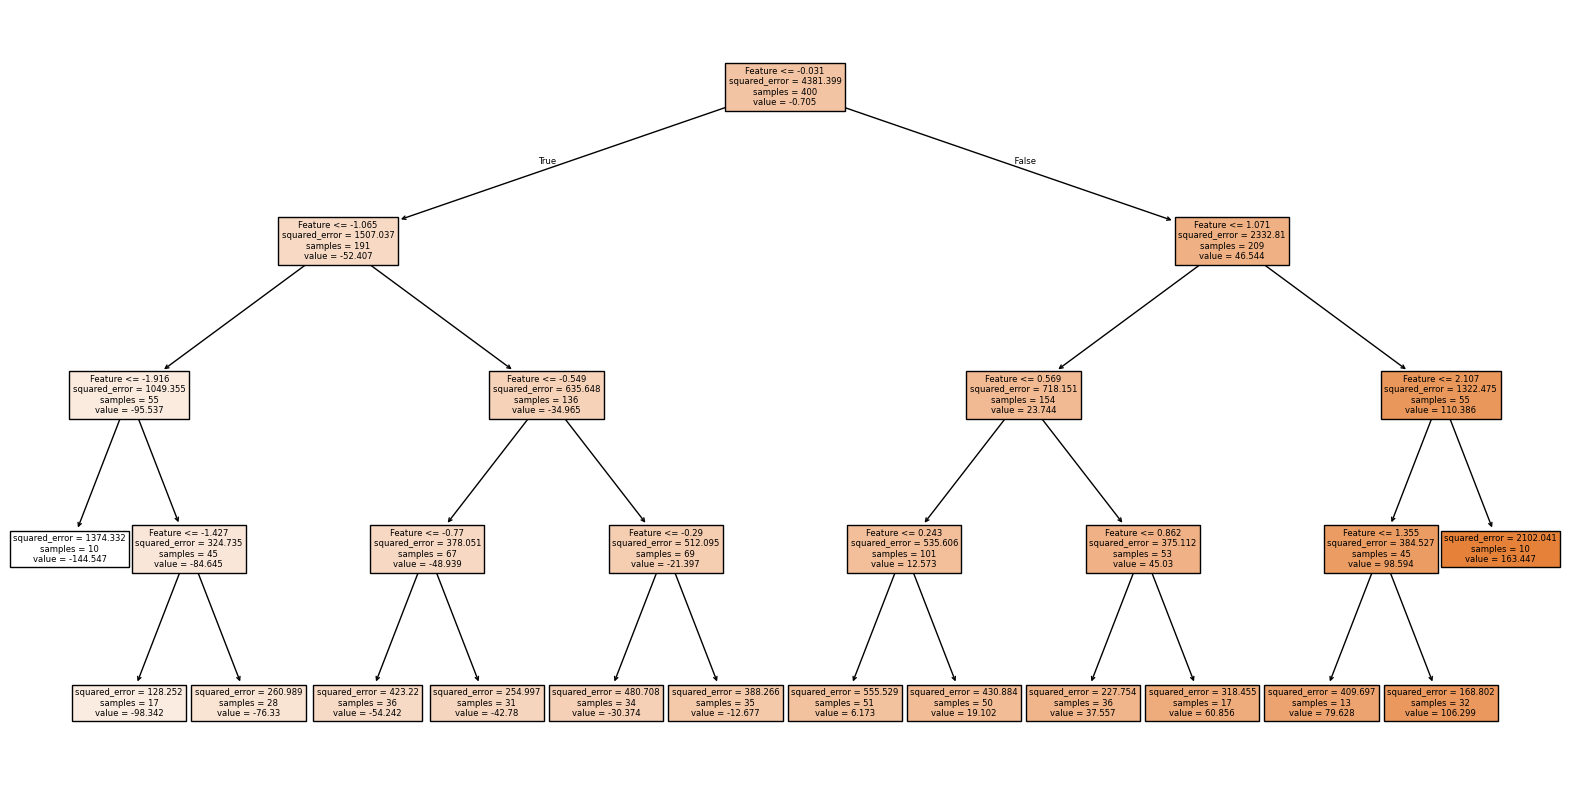

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))

plot_tree(
    dtr,
    filled = True,
    feature_names = ["Feature"],
)

plt.show()

## ✨ 10. Prediction Behavior

Prediction = **mean of target values in that leaf**

This makes predictions **constant inside regions.**

👉 If two points fall in same region:

- They get same predicted value

That’s why regression trees output steps, not curves.

---

## 🧩 11. Handling Categorical Features

Scikit-learn does NOT support raw categorical splits natively.

Solutions:

1. One-Hot Encoding

2. Ordinal encoding (but risky if categories unordered)

3. Target encoding

## 🔥 12. Pruning (Reducing Overfitting)

Big trees = high variance.

### **Two Ways:**

####  **🔴 Pre-Pruning (Stop early)**

- limit depth

- min_samples_leaf

- min_samples_split

- max_leaf_nodes


####  **🔵 Post-Pruning (Grow → prune)**

Use cost-complexity pruning parameter **ccp_alpha**:

$$
R_{\alpha}(T) = R(T) + \alpha|T|
$$

Bigger $α$:

- penalizes large trees

- increases simplicity

In [24]:
# POST PRUNNING 

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
path = dtr.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas


### NOTE: 🌟🌟🌟

> **"Alpha ($\alpha$) serves as a threshold representing the minimum purity gain (or we can say accuracy gain in case of regression) required per additional leaf. Any branch that fails to improve the tree's accuracy by at least this amount is considered 'inefficient' and is pruned to reduce complexity."**



In [25]:
dtrs = []

for ccp_alpha in ccp_alphas:
    dtr_temp = DecisionTreeRegressor(random_state = 0, ccp_alpha = ccp_alpha)
    dtr_temp.fit(X_train, y_train)
    dtrs.append(dtr_temp)
    

In [26]:
#evaluating through validation set

train_scores = [r.score(X_train, y_train) for r in dtrs]
test_scores = [r.score(X_test, y_test) for r in dtrs]

In [27]:
import numpy as np

In [28]:
#finding best alpha

best_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_index]
best_dtr = dtrs[best_index]

print(f"Best ccp_alpha: {best_alpha}")
print(f"Validation Accuracy : {test_scores[best_index]}")
print(f"Training Accuracy: {train_scores[np.argmax(train_scores)]}")

Best ccp_alpha: 8.277769248464937
Validation Accuracy : 0.9041106654195495
Training Accuracy: 1.0


## 13. Performance Metrics for Decision Tree Regression

When evaluating a Decision Tree Regressor, we use continuous error metrics.
These metrics measure how close predictions are to actual values.

---

### 13.1 R² Score (Coefficient of Determination)

R² measures the proportion of variance explained by the model.

$$
R^2 = 1 - \frac{SSE}{SST}
$$

Where:

- $( SSE = \sum (y_i - \hat{y}_i)^2 )$ → model error
- $( SST = \sum (y_i - \bar{y})^2 )$ → baseline error using mean

Interpretation:

- $( R^2 = 1 )$ → perfect fit
- $( R^2 = 0 )$ → no improvement over predicting mean
- $( R^2 < 0 )$ → worse than predicting mean

### 📊 SSE vs SST Comparison

| Term | Full Form | What it Measures | Formula | Meaning in Regression | Interpretation |
|---|---|---|---|---|---|
| **SSE** | **Sum of Squared Errors** | Error **after** fitting the model | $( SSE = \sum (y_i - \hat{y}_i)^2 )$ | Remaining prediction error of the model | Lower = better model fit |
| **SST** | **Total Sum of Squares** | Error **before** any model | $( SST = \sum (y_i - \bar{y})^2 )$ | Total variability in the target variable | Higher = data more spread out |

---

### 🔥 Intuition

- **SST** answers:  
  👉 *“How messy or spread out is the original target data if I only predict the mean?”*

- **SSE** answers:  
  👉 *“After using a model, how much error is still left?”*

---

### 🌟 Relationship to R² Score

$$
R^2 = 1 - \frac{SSE}{SST}
$$

Interpretation:
- If $( SSE \ll SST )$ → Model is good
- If $( SSE \approx SST )$ → Model performs no better than predicting mean
- If $( SSE > SST )$ → Model is worse than predicting mean

---

### Extra Concept (Linear Regression Context)

Sometimes you also see:

$$
SST = SSR + SSE
$$

Where:

- **SSR** = Regression Sum of Squares (explained variance by the model)
- **SSE** = Remaining unexplained variance


---

### 13.2 Mean Squared Error (MSE)

Measures average squared difference between true values and predictions:

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

Properties:
- Penalizes large deviations more strongly
- Useful when large mistakes are unacceptable

---

### 13.3 Mean Absolute Error (MAE)

Measures average absolute difference:

$$
MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|
$$

Properties:
- Less sensitive to extreme outliers than MSE
- Has a clear, intuitive physical meaning (distance in actual units)

> **MAE is often preferred for noisy regression problems.**

---

## 14. Avoiding Overfitting in Decision Tree Regression

Decision trees naturally grow until each leaf fits the data perfectly.
This causes **overfitting**, meaning the model memorizes noise.

Decision trees are **greedy**, because they:
- Consider only one split at a time
- Never examine future consequences
- Can produce overly deep trees

---

### 14.1 Strategies to Reduce Overfitting

✔ Set a maximum depth using `max_depth`  
✔ Use `min_samples_leaf ≥ 5` to smooth predictions  
✔ Enable early stopping using `min_samples_split`  
✔ Use cross-validation to tune parameters  
✔ Avoid fully grown trees without pruning  
✔ Consider ensemble models such as Random Forest or Gradient Boosting

> Controlling tree complexity is essential for generalization.


## 🏠 Decision Tree Regressor with Real Dataset (california housing)

In [42]:
from sklearn.datasets import fetch_california_housing

#Load the dataset
housing = fetch_california_housing(as_frame = True)


In [43]:
# accessing features x and targets y

x = housing.data
x.head(3)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [44]:
y = housing.target
y.head(3)

0    4.526
1    3.585
2    3.521
Name: MedHouseVal, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [51]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(
    # max_depth = 4,
    # min_samples_leaf = 10,
    # random_state = 42,
)

dtr.fit(x_train, y_train)


DecisionTreeRegressor()

In [52]:
# score evaluation

dtr.score(x_test, y_test)

from sklearn.metrics import r2_score
print(f"R2 Score: {r2_score(y_test, dtr.predict(x_test))}")

R2 Score: 0.6215978606987138


In [ ]:
dtr = DecisionTreeRegressor()

path = dtr.cost_complexity_pruning_path(x_train, y_train)

ccp_alphas = path.ccp_alphas

dtrs = []

for ccp_alpha in ccp_alphas:
    dtr_temp = DecisionTreeRegressor(random_state = 0)
    dtr_temp.fit(x_train, y_train)
    dtrs.append(dtr_temp)
    

train_scores = [r.score(x_train, y_train) for r in dtrs]
test_scores = [r.socre(x_test, y_test) for r in dtrs]

best_score_index = np.argmax(test_scores) #best accuracy score index on testing dataset
best_ccp_alpha = ccp_alphas[best_score_index]
best_dtr = dtrs[best_score_index]

print(f"Best CCP ALPHA : {best_ccp_alpha}")
print(f"Best Validation Score: {test_scores[best_score_index]}")
print(f"Training Accuracy: {train_scores[best_score_index]}")

# 🌟🌟🌟 **NOTE: CART Regression Split Explanation (In Depth)**

Decision Tree Regressor uses the **CART algorithm**  
(Classification and Regression Trees).  
For regression, CART tries to split data into two groups so that the total prediction error becomes as small as possible.

---

### 2.1 What the Tree Predicts at a Leaf

In regression trees, the prediction at any leaf is the **mean of all target values** in that leaf:

$$
\hat{y} = \frac{1}{n}\sum_{i=1}^{n} y_i
$$

This is because the **mean minimizes squared error**.

---

### 2.2 How CART Measures Error (Node Impurity)

To measure how “bad” a leaf’s prediction is, we calculate **Sum of Squared Errors (SSE)**:

$$
SSE = \sum_{i=1}^{n}(y_i - \hat{y})^2
$$

Each value is compared to the predicted mean of its group.

- Errors are squared → large mistakes are heavily punished
- Errors are summed → total misfit of the leaf

---

### 2.3 Splitting a Node

When considering a split, CART divides the node into:

- Left child: $( L )$
- Right child: $( R )$

Each child has its own mean and its own squared error.

The total impurity after a split is:

$$
SSE_{split} = SSE_L + SSE_R
$$

---

### 2.4 CART’s Optimization Objective

CART evaluates every possible:

- feature
- threshold

and chooses the combination that **minimizes total error**:

$$
\underset{feature,threshold}{argmin} (SSE_L + SSE_R)
$$

This is a **greedy one-step optimization**.  
It does not look ahead or consider tree depth.

---

### 2.5 How Thresholds Are Determined

For numerical features:

1. Sort unique values of that feature
2. Take midpoints between adjacent values
3. Evaluate SSE for each candidate threshold

Example sorted values:

$$
[10,\ 25,\ 40]
$$

Candidate thresholds:

$$
17.5,\ 32.5
$$

> CART never tries infinite thresholds — only meaningful cut points.

---

## 3. Why Sum the Errors?

Splitting forms **two separate regression models**.  
Each model should fit its own internal samples well.

Total impurity is the **sum of both child errors**:

- If both nodes fit their samples well → small error
- If one fits and one is terrible → error increases

This keeps the model balanced.

---

## 4. What Happens Conceptually

A split is considered “good” when:

- The samples on the left are similar internally
- The samples on the right are similar internally

Thus, the means of each group are accurate for their own members.

This reduces squared deviations.

---

## 5. Why Mean and Not Median?

Because the squared error minimization problem:

$$
\min \sum (y_i - c)^2
$$

has its optimum at the **mean**, not median or mode.

This is a fundamental statistical property.

---

## 6. Why CART Is Greedy

CART does **not** try to compute the optimal global tree.

At each node, it only asks:

> Which split reduces \( SSE_L + SSE_R \) the most right now?

This makes trees:
- Fast to train
- Very sensitive to small data changes
- Prone to overfitting without regularization

---

## 7. Intuitive Summary

- Every leaf predicts the average of its own samples.
- Error = squared distance from that average.
- A split is good if it makes two groups with lower internal errors.
- CART finds the best single split greedily.
- The split with lowest \( SSE_L + SSE_R \) wins.

